# Import package

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
# Predictive Model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor
import xgboost 

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Configuration

In [101]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Load data

In [102]:
listings_df = pd.read_csv('D:\\MyProjects\\01_Airbnb\\Data\\seattle_listings.csv', sep=',')
listings_df.shape

(3818, 92)

# Data Preparation

### Check null values
   First, we start we a check for null values. This is because we can not use columns that has so many null values

In [103]:
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_values_df = Check_Missing_Data(listings_df)
missing_values_df

,Total,Percent
license,3818,1.000000
square_feet,3721,0.974594
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
notes,1606,0.420639
neighborhood_overview,1032,0.270299
cleaning_fee,1030,0.269775
transit,934,0.244631
host_about,859,0.224987


   => Most of the columns have between 0-30% of null ratio. Therefore, I decided to exclude from the analysis the columns with 30% or more of null ratio

In [104]:
missing_values_df[(missing_values_df.Percent < 0.3)].shape[0] 

86

   => This reduces the number of columns from 92 to 86

In [105]:
selected_cols = missing_values_df[(missing_values_df.Percent < 0.3)].index.values
selected_cols

array(['neighborhood_overview', 'cleaning_fee', 'transit', 'host_about',
       'host_acceptance_rate', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_value',
       'review_scores_location', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_rating',
       'reviews_per_month', 'first_review', 'last_review', 'space',
       'host_response_time', 'host_response_rate', 'neighbourhood',
       'xl_picture_url', 'thumbnail_url', 'medium_url',
       'host_neighbourhood', 'summary', 'bathrooms', 'host_location',
       'zipcode', 'bedrooms', 'host_identity_verified',
       'host_has_profile_pic', 'host_picture_url', 'host_since',
       'host_total_listings_count', 'host_listings_count',
       'host_thumbnail_url', 'host_name', 'host_is_superhost', 'beds',
       'property_type', 'host_verifications', 'host_url', 'host_id',
       'picture_url', 'experiences_offered', 'description', 'name',
       'last_scraped', 'scrape_id', 'list

### Remove redundant columns 
Next, I will delete columns that seems not impact price (not contribute to predicting price) or columns that have only one single value

In [106]:
listings_df.apply(lambda x:x.unique().size,axis=0).reset_index()

,index,0
0,id,3818
1,listing_url,3818
2,scrape_id,1
3,last_scraped,1
4,name,3792
5,summary,3479
6,space,3120
7,description,3742
8,experiences_offered,1
9,neighborhood_overview,2507


In [107]:
removed_cols = [ 'transit', 'host_about','host_acceptance_rate', 'first_review', 'last_review',
        'xl_picture_url', 'thumbnail_url', 'medium_url','host_location','host_has_profile_pic', 
        'host_picture_url', 'host_thumbnail_url', 'host_name', 'host_url', 'host_id','picture_url', 
        'experiences_offered', 'name','last_scraped', 'scrape_id', 'listing_url', 'host_total_listings_count',
        'calendar_last_scraped','calendar_updated', 'has_availability','requires_license',
       'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture','host_neighbourhood'
       'require_guest_phone_verification','city', 'state', 'market','host_response_time','host_response_rate',
       'smart_location', 'country_code', 'country','is_location_exact', 'id','host_listings_count']

In [108]:
selected_cols = [e for e in selected_cols if e not in removed_cols]
selected_cols

['neighborhood_overview',
 'cleaning_fee',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_value',
 'review_scores_location',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_rating',
 'reviews_per_month',
 'space',
 'neighbourhood',
 'host_neighbourhood',
 'summary',
 'bathrooms',
 'zipcode',
 'bedrooms',
 'host_identity_verified',
 'host_since',
 'host_is_superhost',
 'beds',
 'property_type',
 'host_verifications',
 'description',
 'street',
 'latitude',
 'neighbourhood_cleansed',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'minimum_nights',
 'cancellation_policy',
 'require_guest_phone_verification',
 'maximum_nights',
 'extra_people',
 'neighbourhood_group_cleansed',
 'calculated_host_listings_count',
 'longitude',
 'guests_included',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price']

In [109]:
len(selected_cols)

46

   => This reduces the number of columns to 47

In [110]:
data_df = listings_df.copy(deep=True)
data_df = data_df[selected_cols]
data_df.shape

(3818, 46)

### Convert columns from string to numeric values

In [111]:
data_df['price'] = data_df['price'].str.replace("[$, ]", "").astype("float")
data_df['cleaning_fee'] = data_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
data_df['extra_people'] = data_df['extra_people'].str.replace("[$, ]", "").astype("float")

In [112]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'] = listings_df['extra_people'].str.replace("[$, ]", "").astype("float")

### Select all numerical features

In [113]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape       

(3818, 26)

   => There are 26 numerical features

In [114]:
Check_Missing_Data(numericdata)

,Total,Percent
cleaning_fee,1030,0.269775
review_scores_accuracy,658,0.172342
review_scores_checkin,658,0.172342
review_scores_value,656,0.171818
review_scores_location,655,0.171556
review_scores_cleanliness,653,0.171032
review_scores_communication,651,0.170508
review_scores_rating,647,0.169460
reviews_per_month,627,0.164222
bathrooms,16,0.004191


### Filling NA values for numeric features

In [115]:
#fill missing values for review scores columns
review_columns = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_value',
                  'review_scores_location', 'review_scores_cleanliness','review_scores_communication',
                  'review_scores_rating','reviews_per_month', 'cleaning_fee']
for column in review_columns:
    data_df[column].fillna(data_df[column].mean(), inplace = True)

numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape 
Check_Missing_Data(numericdata)

,Total,Percent
bathrooms,16,0.004191
bedrooms,6,0.001572
beds,1,0.000262
price,0,0.000000
accommodates,0,0.000000
review_scores_accuracy,0,0.000000
review_scores_checkin,0,0.000000
review_scores_value,0,0.000000
review_scores_location,0,0.000000
review_scores_cleanliness,0,0.000000


In [116]:
#fill in missing values for bathrooms, bedrooms and beds with mode
data_df['bathrooms'] = data_df['bathrooms'].fillna(data_df['bathrooms'].mode()[0])
data_df['bedrooms'] = data_df['bedrooms'].fillna(data_df['bedrooms'].mode()[0])
data_df['beds'] = data_df['beds'].fillna(data_df['beds'].mode()[0])

numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape 
Check_Missing_Data(numericdata)

,Total,Percent
price,0,0.0
accommodates,0,0.0
review_scores_accuracy,0,0.0
review_scores_checkin,0,0.0
review_scores_value,0,0.0
review_scores_location,0,0.0
review_scores_cleanliness,0,0.0
review_scores_communication,0,0.0
review_scores_rating,0,0.0
reviews_per_month,0,0.0


### Add log_price

In [117]:
data_df['log_price'] = data_df['price'].apply(lambda x: math.log(x))

### Seperate features and label 

In [118]:
col_list = list(numericdata.columns.values)
col_list = [e for e in col_list if e not in ['price','log_price']]
X_data = data_df.loc[:,col_list]       
Y_data = data_df.loc[numericdata.index.values,'log_price']
X_data.shape 

(3818, 25)

### Normalization

In [119]:
def Normalize_Data(X_data):    
    for col in X_data.columns.values:
        X_data[col] = X_data[col].astype(float)
        mean = np.mean(X_data[col])
        std = np.std(X_data[col])
        X_data[col] = X_data[col].apply(lambda x: (x - mean) / std)
    return X_data

X_data = Normalize_Data(X_data)
X_data.head()

,cleaning_fee,review_scores_accuracy,review_scores_checkin,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_communication,review_scores_rating,reviews_per_month,bathrooms,bedrooms,beds,latitude,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights,extra_people,calculated_host_listings_count,longitude,guests_included,accommodates
0,-3.031586e-14,5.726658e-01,3.937630e-01,8.023812e-01,-1.063670e+00,6.112031e-01,3.679779e-01,7.654173e-02,1.195309e+00,-0.438461,-0.348068,-0.645342,0.170240,-0.228908,0.179356,0.379264,0.798601,4.897864,-0.083987,-0.246795,-0.322324,-0.160602,-1.194754,0.249756,0.329029
1,-5.204004e-01,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,2.426703e-01,-3.595500e-01,-0.438461,-0.348068,-0.645342,0.236078,-0.311063,-1.020585,-1.235563,0.364696,0.550724,-0.022651,-0.410158,-0.606680,0.518255,-1.025923,-0.513098,0.329029
2,5.711680e+00,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,4.087988e-01,-5.576595e-01,5.500872,4.183643,4.621311,0.017732,-1.296929,-1.320570,-1.206202,-0.195436,-0.058936,0.100020,-0.445801,0.815098,-0.160602,-1.146171,6.352583,3.869138
3,-3.031586e-14,1.119073e-14,-1.049403e-13,1.769432e-13,5.275077e-14,6.363495e-14,-1.304567e-13,-1.487322e-13,-1.439645e-14,-0.438461,-1.480996,0.232433,0.220980,-1.379085,-1.577700,-1.705330,-0.802903,-0.589075,-0.083987,0.204680,-0.606680,-0.330316,-1.139743,-0.513098,-0.176701
4,1.517011e+00,-1.002290e+00,3.937630e-01,-6.624741e-01,-1.063670e+00,-7.666159e-01,3.679779e-01,-4.218439e-01,-7.137458e-01,1.258492,1.917787,1.110209,0.091937,1.085580,0.993601,0.937113,0.948495,0.418189,-0.083987,0.204680,0.246387,-0.330316,-1.240293,3.301169,1.340489


### Split data to training set and test set

In [120]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

# Important numerical feature selection 

### Multiple Linear Regression

#### Train model with all numeric features

In [121]:
def Model_LinearRegression1(X_data, Y_data):
    #add constant to data
    X = sm.add_constant(X_data)
    # Fit the linear model
    model = sm.OLS(Y_data, X)
    results = model.fit()
    return results.summary()

Model_LinearRegression1(X_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:14:18   Log-Likelihood:                -1184.1
No. Observations:                2672   AIC:                             2420.
Df Residuals:                    2646   BIC:                             2573.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.6810      0.007    634.772      0.000       4.667       4.695
cleaning_fee                       0.1248      0.010     12.538      0.000       0.105       0.144
review_scores_accuracy             0.0417      0.010      4.096      0.000       0.022       0.062
review_scores_checkin             -0.0263      0.011     -2.456      0.014      -0.047      -0.005
review_scores_value               -0.0824      0.011     -7.664      0.000      -0.103      -0.061
review_scores_location             0.0629      0.008      7.639      0.000       0.047       0.079
review_scores_cleanliness          0.0238      0.010      2.289      0.022       0.003       0.044
review_scores_communication        0.0109      0.011      1.022      0.307      -0.010       0.032
review_scores_rating               0.0192      0.013      1.505      0.132      -0.006       0.044
reviews_per_month                 -0.0575      0.009     -6.182      0.000      -0.076      -0.039
bathrooms                          0.0186      0.009      2.011      0.044       0.000       0.037
bedrooms                           0.0346      0.014      2.559      0.011       0.008       0.061
beds                              -0.0619      0.015     -4.014      0.000      -0.092      -0.032
latitude                          -0.0259      0.007     -3.462      0.001      -0.041      -0.011
availability_30                    0.0188      0.023      0.799      0.424      -0.027       0.065
availability_60                    0.0179      0.049      0.366      0.715      -0.078       0.114
availability_90                   -0.0505      0.037     -1.355      0.175      -0.123       0.023
availability_365                   0.0152      0.010      1.551      0.121      -0.004       0.034
number_of_reviews                 -0.0008      0.009     -0.080      0.936      -0.019       0.018
minimum_nights                     0.0657      0.050      1.311      0.190      -0.033       0.164
maximum_nights                     0.0067      0.026      0.259      0.796      -0.044       0.058
extra_people                       0.0141      0.008      1.785      0.074      -0.001       0.030
calculated_host_listings_count    -0.0586      0.008     -7.446      0.000      -0.074      -0.043
longitude                         -0.0286      0.008     -3.803      0.000      -0.043      -0.014
guests_included                    0.0229      0.010      2.389      0.017       0.004       0.042
accommodates                       0.2990      0.017     17.759      0.000       0.266       0.332
==============================================================================
Omnibus:                       36.813   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (J

   => Insignificant features: 'review_scores_checkin','review_scores_communication','bathrooms','availability_30','availability_60','availability_90','availability_365,'number_of_reviews','minimum_nights','maximum_nights','extra_people'

#### remove insignificant features

In [122]:
remove_list = ['review_scores_communication',
               'availability_30','availability_60','availability_90','availability_365',
               'number_of_reviews','minimum_nights','maximum_nights','extra_people']
col_list1 = [e for e in col_list if e not in remove_list]

In [123]:
X1_train = X_train[col_list1]
X1_test = X_test[col_list1]
X1_train.shape[1]

16

#### Retrain model with significant features

In [124]:
Model_LinearRegression1(X1_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:14:19   Log-Likelihood:                -1189.8
No. Observations:                2672   AIC:                             2414.
Df Residuals:                    2655   BIC:                             2514.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.6804      0.007    638.031      0.000       4.666       4.695
cleaning_fee                       0.1252      0.010     12.673      0.000       0.106       0.145
review_scores_accuracy             0.0415      0.010      4.094      0.000       0.022       0.061
review_scores_checkin             -0.0220      0.009     -2.404      0.016      -0.040      -0.004
review_scores_value               -0.0819      0.011     -7.661      0.000      -0.103      -0.061
review_scores_location             0.0644      0.008      7.850      0.000       0.048       0.080
review_scores_cleanliness          0.0232      0.010      2.239      0.025       0.003       0.044
review_scores_rating               0.0222      0.013      1.769      0.077      -0.002       0.047
reviews_per_month                 -0.0614      0.008     -7.898      0.000      -0.077      -0.046
bathrooms                          0.0192      0.009      2.076      0.038       0.001       0.037
bedrooms                           0.0348      0.013      2.594      0.010       0.009       0.061
beds                              -0.0619      0.015     -4.025      0.000      -0.092      -0.032
latitude                          -0.0258      0.007     -3.446      0.001      -0.040      -0.011
calculated_host_listings_count    -0.0589      0.008     -7.602      0.000      -0.074      -0.044
longitude                         -0.0291      0.008     -3.872      0.000      -0.044      -0.014
guests_included                    0.0288      0.009      3.285      0.001       0.012       0.046
accommodates                       0.2985      0.017     17.763      0.000       0.266       0.331
==============================================================================
Omnibus:                       36.280   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.896
Skew:                          -0.013   Prob(JB):                     8.09e-15
Kurtosis:                       3.763   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Split data into training set and test set

In [125]:
def Model_LinearRegression3(X_train, Y_train, X_test, Y_test, flg = 0):
    # Choose a class of model
    from sklearn.linear_model import LinearRegression
    # Choose model hyperparameters
    model = LinearRegression(fit_intercept=True)
    # Fit the model to the train data set
    model.fit(X_train, Y_train)    
    # prediction
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)        
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred

def Regression_Metrics(model, x_train, y_train, y_train_pred, x_test, y_test, y_test_pred):  
    
    print('Train R-squared: %.4f' % model.score(x_train, y_train))
    print('Test R-squared: %.4f' % model.score(x_test, y_test))
    print()  
    print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


In [126]:
model, Y_train_pred, Y_test_pred  = Model_LinearRegression3(X1_train,Y_train,X1_test,Y_test,1)  

Train R-squared: 0.5456
Test R-squared: 0.5120

Train RMSE: 0.3777062934667205
Test RMSE: 0.40324905431532715


#### Important Features

In [127]:
def Visualize_ImportantFeatures(X_train,model_feature_importances_,size=(7,6)):
    # Variable Importance
    feature_labels = X_train.columns
    # Get numerical feature importance
    importances = list(model_feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, np.abs(round(importance, 2))) for feature, importance in zip(feature_labels, importances)]
    # Sort the feature importance by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importance 
    [print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

    # Visualizations 
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
    plt.figure(figsize = size)
    # list of x locations for plotting
    feature_labels = [pair[0] for pair in feature_importances];
    x_values = list(range(len(feature_labels)))
    y_values = [pair[1] for pair in feature_importances];
    # Make a bar chart
    # plt.bar(x_values, y_values, orientation = 'horizontal')
    plt.barh(x_values, y_values)
    # Tick labels for x axis
    # plt.xticks(x_values, feature_labels, rotation='horizontal')
    plt.yticks(x_values, feature_labels, rotation='horizontal')
    # Axis labels and title
    plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');
 

accommodates                                       Importance: 0.3
cleaning_fee                                       Importance: 0.13
review_scores_value                                Importance: 0.08
review_scores_location                             Importance: 0.06
reviews_per_month                                  Importance: 0.06
beds                                               Importance: 0.06
calculated_host_listings_count                     Importance: 0.06
review_scores_accuracy                             Importance: 0.04
bedrooms                                           Importance: 0.03
latitude                                           Importance: 0.03
longitude                                          Importance: 0.03
guests_included                                    Importance: 0.03
review_scores_checkin                              Importance: 0.02
review_scores_cleanliness                          Importance: 0.02
review_scores_rating                             

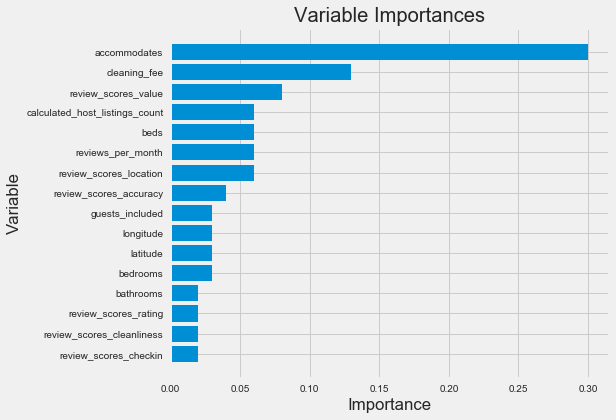

In [128]:
Visualize_ImportantFeatures(X1_train,model.coef_) 

   => The most important features in multiple linear regression: accommodates, cleaning_fee, review_scores_value, review_scores_location, calculated_host_listings_count, beds, reviews_per_month

#### Cross validation

In [129]:
def CV_Model(model,X, Y):
    cv_scores = cross_val_score(model, X_data, Y_data, scoring = 'r2', cv = 10)
    rmse = np.sqrt(-cross_val_score(model, X_data, Y_data, scoring="neg_mean_squared_error", cv = 10))
    print('r2 score: ',cv_scores)
    print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
    print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

In [130]:
X1_data = X_data[col_list1]
X1_data.shape

CV_Model(linear_model.LinearRegression(),X1_data,Y_data)

r2 score:  [0.66971734 0.59155222 0.55265229 0.2211334  0.35065171 0.30956138
 0.45976912 0.49070999 0.45499872 0.50208961]
Average r2 score:  0.46
Average rmse score:  0.4


### Random Forest 

#### Split data into training set and test set

In [131]:
def Model_RandomForest(X_train, Y_train, X_test, Y_test, flg = 0):   
    # train model
    model = RandomForestRegressor(n_estimators = 100, random_state=42)
    # predicting label
    model.fit(X_train, Y_train)
    #Default parameters our model used
    model.get_params()    
    # predicting
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)            
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)  
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred    

In [132]:
X_train.shape

(2672, 25)

In [133]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.9522
Test R-squared: 0.6727

Train RMSE: 0.12249422845167057
Test RMSE: 0.3302818191233967


bedrooms                                           Importance: 0.37
accommodates                                       Importance: 0.12
latitude                                           Importance: 0.09
cleaning_fee                                       Importance: 0.08
longitude                                          Importance: 0.06
reviews_per_month                                  Importance: 0.04
bathrooms                                          Importance: 0.04
availability_365                                   Importance: 0.03
review_scores_rating                               Importance: 0.02
number_of_reviews                                  Importance: 0.02
minimum_nights                                     Importance: 0.02
calculated_host_listings_count                     Importance: 0.02
review_scores_value                                Importance: 0.01
review_scores_location                             Importance: 0.01
review_scores_cleanliness                       

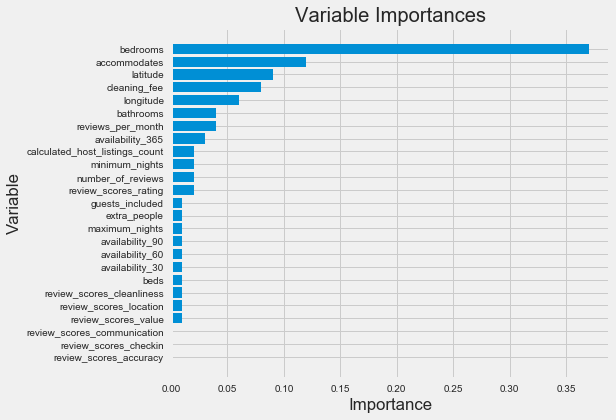

In [134]:
Visualize_ImportantFeatures(X_train,model.feature_importances_)   

   * The most important features: bedrooms, accommodates, latitude, cleaning_fee, longitude, reviews_per_month, bathrooms => Compare to Linear Regression model, the results are different for review_scores_accuracy
   * insignificant features: review_scores_accuracy, review_scores_checkin, review_scores_communication => Compare to Linear Regression Model, there are some differences: availability_365, minimum_nights, number_of_reviews are quite significant in Random forest but insignificant in Linear Regression and has been removed

#### Cross validation

In [135]:
RandomForestRegressor(n_estimators=100)
CV_Model(model,X_data, Y_data)

r2 score:  [0.7171826  0.69498041 0.64650843 0.50473952 0.55837443 0.59096051
 0.67971527 0.58931121 0.61161081 0.57540951]
Average r2 score:  0.62
Average rmse score:  0.34


### Boosting Tree

#### Split data into training set and test set

In [136]:
def Model_GBT(X_train, Y_train, X_test, Y_test,flg=0): 
    # train model
    model = GradientBoostingRegressor(n_estimators = 100, random_state=42)
    model.fit(X_train, Y_train)
    #Default parameters our model used
    model.get_params()    
    # Predicting label
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)    
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred    

In [137]:
model, Y_train_pred, Y_test_pred = Model_GBT(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7591
Test R-squared: 0.6759

Train RMSE: 0.27498558980796134
Test RMSE: 0.3286226659982657


latitude                                           Importance: 0.15
accommodates                                       Importance: 0.1
cleaning_fee                                       Importance: 0.09
bedrooms                                           Importance: 0.08
longitude                                          Importance: 0.08
reviews_per_month                                  Importance: 0.06
extra_people                                       Importance: 0.05
availability_30                                    Importance: 0.04
availability_365                                   Importance: 0.04
number_of_reviews                                  Importance: 0.04
minimum_nights                                     Importance: 0.04
calculated_host_listings_count                     Importance: 0.04
guests_included                                    Importance: 0.04
bathrooms                                          Importance: 0.03
review_scores_cleanliness                        

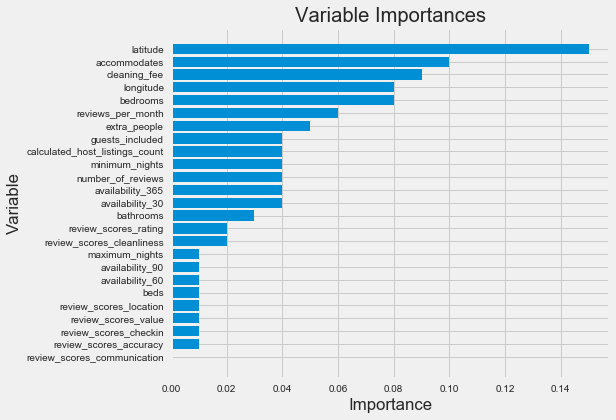

In [138]:
 Visualize_ImportantFeatures(X_train,model.feature_importances_)  

#### Cross validation

In [139]:
X1_data = X_data[col_list1]
X1_data.shape

model = GradientBoostingRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.74183874 0.71585131 0.64488126 0.4676301  0.54053268 0.63071029
 0.69846505 0.59825544 0.63463635 0.60111219]
Average r2 score:  0.63
Average rmse score:  0.33


### XGBoost

In [140]:
#train XGBoost model
model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model.fit(X_train,Y_train)

#calculate and print scores for the model for top 15 features
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, Y_train_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print('R^2 train 1: %.3f, test: %.3f' % (
        r2_score(Y_train, Y_train_pred),
        r2_score(Y_test, Y_test_pred)))

print('R^2 train 2: %.3f, test: %.3f' % (
        model.score(X_train, Y_train),
        model.score(X_test, Y_test)))


MSE train: 0.023, test: 0.103
R^2 train 1: 0.926, test: 0.692
R^2 train 2: 0.926, test: 0.692


In [141]:
def Model_XGBoost(X_train, Y_train, X_test, Y_test,flg=0):
    model = xgboost.XGBRegressor(n_estimators=100, random_state=42)
    # train model
    model.fit(X_train,Y_train)
    #calculate and print scores for the model for top 15 features
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred        

In [142]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7557
Test R-squared: 0.6754

Train RMSE: 0.2769393983306011
Test RMSE: 0.3289082585729376


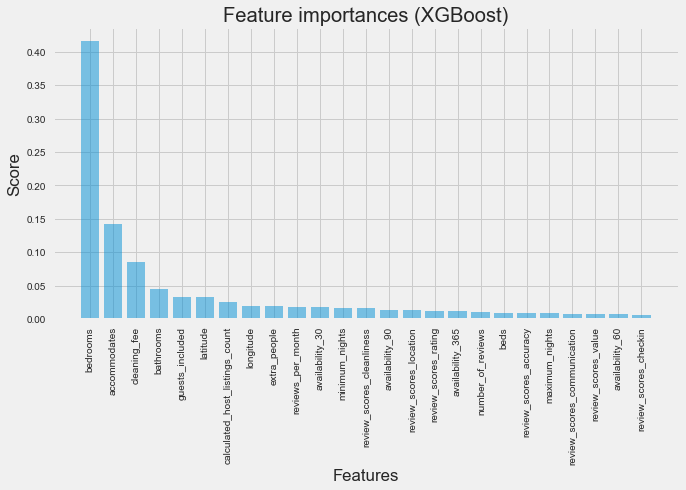

In [143]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = feature_importances['name']
y_pos = np.arange(len(features))
scores = feature_importances['score']
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')
plt.show()

#### Cross validation

In [144]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.74357002 0.71826333 0.64871944 0.47128936 0.54009336 0.63870631
 0.70054395 0.60391583 0.63429513 0.60533747]
Average r2 score:  0.63
Average rmse score:  0.33


### Summary
   * There are several difference in the list of important features as well as insignificant features among the models. this should be investigated further the approaches to measure the importance of features to understand the underlying reason. however, for now, the GBT and XGBoost yeild the best performance, hence deciding significant features for constructing prediction models are based on the result from these models which include all features except for 'review_scores_communication'

# Add categorical features

### room_type

In [145]:
# Approach 1:create dummy variables
room_type = data_df.loc[data_df.room_type.isnull(),'room_type']
room_dummies = pd.get_dummies(data_df[['room_type']], prefix='room_type', prefix_sep='_')
room_dummies.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [175]:
X_data =  X_bk
X_data.shape

(3818, 25)

In [146]:
X_bk = X_data.copy(deep=True)

In [176]:
X_data = pd.concat((X_data,room_dummies.astype(int)),axis=1)

In [177]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [178]:
X_train.shape 

(2672, 28)

#### Linear Regression

In [150]:
CV_Model(linear_model.LinearRegression(),X_data,Y_data)

r2 score:  [0.75078605 0.68957667 0.66968749 0.39811602 0.52575544 0.50283046
 0.43918393 0.61915471 0.58887069 0.62317457]
Average r2 score:  0.58
Average rmse score:  0.35


In [151]:
model, Y_train_pred, Y_test_pred  = Model_LinearRegression3(X_train,Y_train,X_test,Y_test,1) 

Train R-squared: 0.6531
Test R-squared: 0.6159

Train RMSE: 0.32999532601290515
Test RMSE: 0.3577775385295868


#### Random Forest

In [152]:
model = RandomForestRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.76759218 0.72472847 0.69359651 0.50724895 0.60507227 0.63942375
 0.72500956 0.6737782  0.60720492 0.65446659]
Average r2 score:  0.66
Average rmse score:  0.32


In [153]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.9577
Test R-squared: 0.7236

Train RMSE: 0.1151682875719161
Test RMSE: 0.3034759363707884


#### Gradient Boosting Tree

In [154]:
model = GradientBoostingRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.77613341 0.73542751 0.7000007  0.50496926 0.60331099 0.67650012
 0.74112371 0.66633235 0.65883756 0.67142449]
Average r2 score:  0.67
Average rmse score:  0.31


In [155]:
model, Y_train_pred, Y_test_pred = Model_GBT(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7851
Test R-squared: 0.7257

Train RMSE: 0.25970895990836407
Test RMSE: 0.3023262908860385


#### XGBoost

In [156]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.78083357 0.74263535 0.69330163 0.51472412 0.61109405 0.68843936
 0.73947753 0.65889818 0.65739508 0.66629175]
Average r2 score:  0.68
Average rmse score:  0.31


In [157]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7793
Test R-squared: 0.7214

Train RMSE: 0.2632158948661068
Test RMSE: 0.30468680952245597


In [174]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

XGBoostError: need to call fit or load_model beforehand

# Feature Extraction

### Common functions

In [159]:
def Feature_Frequency(df, feature, name):
    feature_frequency = pd.DataFrame(df.groupby(feature).id.count())
    feature_frequency.columns = ['Number_Of_Listings']
    feature_frequency = feature_frequency.reset_index()
    feature_frequency = feature_frequency.sort_values('Number_Of_Listings',ascending=[0])
    plt.figure(figsize=(7, 5))
    feature_frequency.plot(kind='bar', x=feature, y='Number_Of_Listings', title = name + ' ' + feature + ' frequency' , legend = False)
    plt.xlabel(feature)
    plt.ylabel('Frequency')  
    plt.show()
    return feature_frequency

def Feature_Price(df, feature, name):
    feature_price = df.groupby(feature).price.mean()
    feature_price = feature_price.reset_index()
    feature_price = feature_price.rename(columns={'price':'average_Price'})
    feature_price = feature_price.sort_values('average_Price',ascending=[0])
    plt.figure(figsize=(7, 5))
    feature_price.plot(kind='bar', x=feature, y='average_Price', title = name + ' ' + feature + ' average price', legend = False)
    plt.xlabel(feature)
    plt.ylabel('Average Price') 
    plt.show()
    return feature_price

### zipcode

In [160]:
zipcode_df = listings_df[['zipcode','price','id']]
zipcode_df.zipcode.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

In [161]:
zipcode_df.isnull().sum()

zipcode    7
price      0
id         0
dtype: int64

<Figure size 504x360 with 0 Axes>

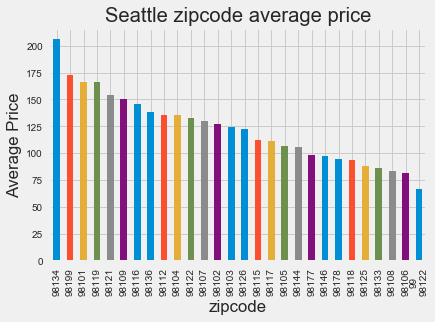

,zipcode,average_Price
20,98134,206.600000
26,98199,172.393939
0,98101,166.721393
14,98119,166.377622
15,98121,153.785714
8,98109,150.247525
11,98116,145.348214
21,98136,137.909091
9,98112,135.437126
3,98104,135.221053


In [162]:
Feature_Price(zipcode_df,'zipcode','Seattle')

In [163]:
data_df.loc[data_df.zipcode == '99\n98122','zipcode'] = '98122'

In [164]:
data_df['zipcode'].isnull().sum()

7

In [165]:
data_df['zipcode'].fillna(data_df['zipcode'].mode()[0],inplace=True)

In [166]:
data_df['zipcode'].value_counts()

98122    428
98103    394
98102    339
98105    225
98109    202
98101    201
98144    200
98121    196
98107    180
98115    178
98112    167
98117    164
98118    154
98119    143
98116    112
98104     95
98125     71
98199     66
98126     63
98106     58
98108     56
98133     46
98136     44
98177     19
98178      7
98146      5
98134      5
Name: zipcode, dtype: int64

In [167]:
# Approach 1:create dummy variables
zipcode_dummies = pd.get_dummies(data_df[['zipcode']], prefix='zipcode', prefix_sep='_')
zipcode_dummies.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
X_data = pd.concat((X_data,zipcode_dummies.astype(int)),axis=1)

In [169]:
X_data.shape

(3818, 55)

In [170]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [171]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7805
Test R-squared: 0.7202

Train RMSE: 0.26249175884984977
Test RMSE: 0.30533718914872726


room_type_Entire home/apt                          Importance: 0.33000001311302185
bedrooms                                           Importance: 0.20999999344348907
accommodates                                       Importance: 0.09000000357627869
bathrooms                                          Importance: 0.05999999865889549
cleaning_fee                                       Importance: 0.029999999329447746
latitude                                           Importance: 0.019999999552965164
availability_90                                    Importance: 0.019999999552965164
room_type_Private room                             Importance: 0.019999999552965164
room_type_Shared room                              Importance: 0.019999999552965164
review_scores_location                             Importance: 0.009999999776482582
review_scores_rating                               Importance: 0.009999999776482582
reviews_per_month                                  Importance: 0.009999999776482

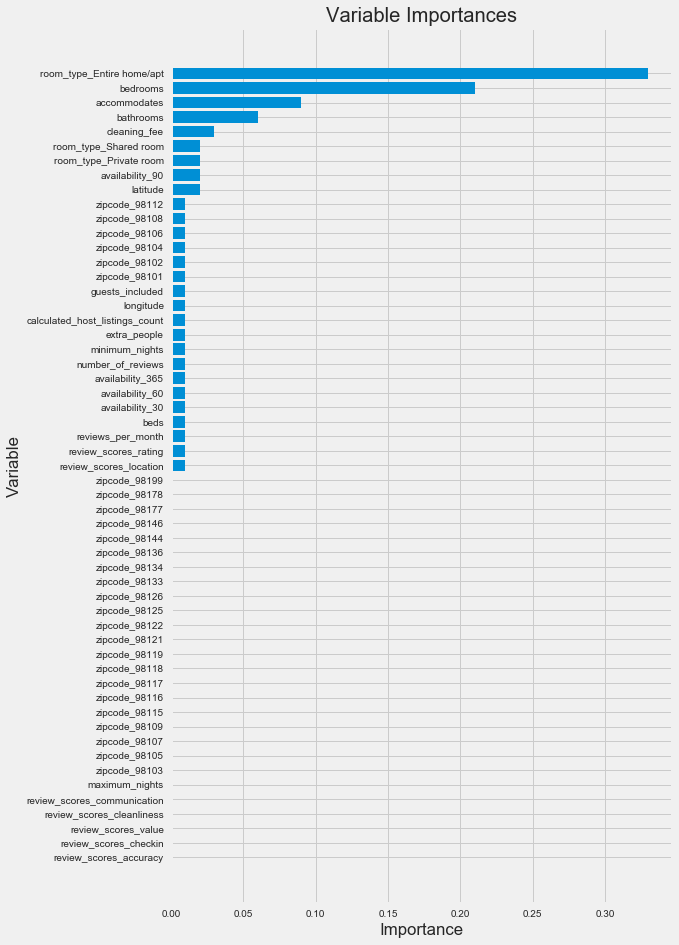

In [172]:
Visualize_ImportantFeatures(X_train,model.feature_importances_,(8,15)) 

In [173]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.77516458 0.74382949 0.7045704  0.5091027  0.62077324 0.68466736
 0.74590422 0.65916846 0.65450604 0.6616737 ]
Average r2 score:  0.68
Average rmse score:  0.31


### neighbourhood_group_cleansed

In [93]:
neighbourhood_group_df = listings_df[['neighbourhood_group_cleansed','price','id']]
neighbourhood_group_df.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [94]:
neighbourhood_group_df.isnull().sum()

neighbourhood_group_cleansed    0
price                           0
id                              0
dtype: int64

<Figure size 504x360 with 0 Axes>

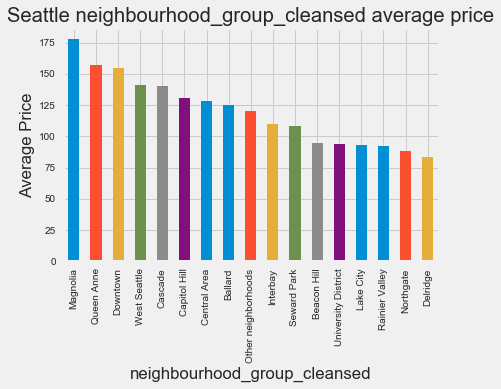

,neighbourhood_group_cleansed,average_Price
9,Magnolia,177.672131
12,Queen Anne,157.223729
6,Downtown,154.405660
16,West Seattle,141.359606
3,Cascade,140.101124
2,Capitol Hill,130.592593
4,Central Area,128.338753
0,Ballard,124.682609
11,Other neighborhoods,119.968514
7,Interbay,109.727273


In [320]:
Feature_Price(neighbourhood_group_df,'neighbourhood_group_cleansed','Seattle')

In [95]:
neighbourhood_group_dummies = pd.get_dummies(neighbourhood_group_df[['neighbourhood_group_cleansed']], prefix='neighbourhood', prefix_sep='_')
neighbourhood_group_dummies.head()

,neighbourhood_Ballard,neighbourhood_Beacon Hill,neighbourhood_Capitol Hill,neighbourhood_Cascade,neighbourhood_Central Area,neighbourhood_Delridge,neighbourhood_Downtown,neighbourhood_Interbay,neighbourhood_Lake City,neighbourhood_Magnolia,neighbourhood_Northgate,neighbourhood_Other neighborhoods,neighbourhood_Queen Anne,neighbourhood_Rainier Valley,neighbourhood_Seward Park,neighbourhood_University District,neighbourhood_West Seattle
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [96]:
X1_data = pd.concat((X_data,neighbourhood_group_dummies),axis=1)
X1_data.shape

(3818, 67)

In [97]:
X_train, X_test, Y_train, Y_test=train_test_split(X1_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [98]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.7289963  0.71623301 0.64456164 0.35651899 0.52530632 0.58594246
 0.65889437 0.57555664 0.59584493 0.56571086]
Average r2 score:  0.6
Average rmse score:  0.34


### amenities

In [350]:
def count_words(df):
    word_list = []
    for element in df:
        # element = element[1:-1]
        x = element.split()
        word_list.append(len(x))  
    
    return word_list

In [353]:
data_df['num_of_amenities'] = count_words(data_df.amenities)
data_df['num_of_amenities'].head()

0     5
1    14
2    18
3     9
4    10
Name: num_of_amenities, dtype: int64

In [207]:
amenities_df = listings_df[['amenities','price','id']]
amenities_df.head()

,amenities,price,id
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,241032
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,953595
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,3308979
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,7421966
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,278830


In [183]:
def count_word(df, column_name):
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    
    return values_sorted 
 

In [198]:
amenity_list = count_word(amenities_df, 'amenities')

In [199]:
len(amenity_list)

42

In [200]:
amenity_list[0:2]

[('Wireless Internet', 3177), ('Heating', 3139)]

In [201]:
for value in amenity_list:
    print(value[0])

Wireless Internet
Heating
Kitchen
Smoke Detector
Essentials
Dryer
Washer
Internet
Shampoo
TV
Carbon Monoxide Detector
Free Parking on Premises
Fire Extinguisher
Family/Kid Friendly
First Aid Kit
Cable TV
Pets live on this property
Indoor Fireplace
Hangers
Elevator in Building
Hair Dryer
Laptop Friendly Workspace
Iron
Safety Card
Air Conditioning
24-Hour Check-in
Dog(s)
Buzzer/Wireless Intercom
Pets Allowed
Cat(s)
Gym
Wheelchair Accessible
Breakfast
Hot Tub
Suitable for Events
Pool
Lock on Bedroom Door
Smoking Allowed
Doorman
Other pet(s)
Washer / Dryer



In [204]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

In [208]:
# split into columns
for value in amenity_list:
    amenities_df['amenities_' + value[0]] = amenities_df.apply(lambda row: get_val_from_list(row, 'amenities', value[0]),axis=1)


In [209]:
amenities_df.head()

,amenities,price,id,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Free Parking on Premises,amenities_Fire Extinguisher,amenities_Family/Kid Friendly,amenities_First Aid Kit,amenities_Cable TV,amenities_Pets live on this property,amenities_Indoor Fireplace,amenities_Hangers,amenities_Elevator in Building,amenities_Hair Dryer,amenities_Laptop Friendly Workspace,amenities_Iron,amenities_Safety Card,amenities_Air Conditioning,amenities_24-Hour Check-in,amenities_Dog(s),amenities_Buzzer/Wireless Intercom,amenities_Pets Allowed,amenities_Cat(s),amenities_Gym,amenities_Wheelchair Accessible,amenities_Breakfast,amenities_Hot Tub,amenities_Suitable for Events,amenities_Pool,amenities_Lock on Bedroom Door,amenities_Smoking Allowed,amenities_Doorman,amenities_Other pet(s),amenities_Washer / Dryer,amenities_
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,241032,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,953595,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,3308979,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,7421966,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,278830,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
amenities_col = amenities_df.columns.values[3:]
amenities_col 

array(['amenities_Wireless Internet', 'amenities_Heating',
       'amenities_Kitchen', 'amenities_Smoke Detector',
       'amenities_Essentials', 'amenities_Dryer', 'amenities_Washer',
       'amenities_Internet', 'amenities_Shampoo', 'amenities_TV',
       'amenities_Carbon Monoxide Detector',
       'amenities_Free Parking on Premises',
       'amenities_Fire Extinguisher', 'amenities_Family/Kid Friendly',
       'amenities_First Aid Kit', 'amenities_Cable TV',
       'amenities_Pets live on this property',
       'amenities_Indoor Fireplace', 'amenities_Hangers',
       'amenities_Elevator in Building', 'amenities_Hair Dryer',
       'amenities_Laptop Friendly Workspace', 'amenities_Iron',
       'amenities_Safety Card', 'amenities_Air Conditioning',
       'amenities_24-Hour Check-in', 'amenities_Dog(s)',
       'amenities_Buzzer/Wireless Intercom', 'amenities_Pets Allowed',
       'amenities_Cat(s)', 'amenities_Gym',
       'amenities_Wheelchair Accessible', 'amenities_Breakfast',

In [218]:
amenity_price_df = pd.DataFrame(amenity_list)
amenity_price_df.columns = ['amenities','frequency']
amenity_price_df['avg_price'] = 0

In [219]:
amenity_price_df['amenities'] = amenity_price_df['amenities'].apply(lambda x:'amenities_'+ x)

In [220]:
amenity_price_df

,amenities,frequency,avg_price
0,amenities_Wireless Internet,3177,0
1,amenities_Heating,3139,0
2,amenities_Kitchen,2947,0
3,amenities_Smoke Detector,2849,0
4,amenities_Essentials,2789,0
5,amenities_Dryer,2554,0
6,amenities_Washer,2549,0
7,amenities_Internet,2375,0
8,amenities_Shampoo,2302,0
9,amenities_TV,2212,0


In [226]:
e
# amenities_df['amenities_Wireless Internet']
amenities_df[e]

AttributeError: 'DataFrame' object has no attribute 'e'

In [229]:
for e in amenities_col:
    avg_price = amenities_df.loc[amenities_df[e] == 1, 'price'].mean()
    amenity_price_df.loc[amenity_price_df.amenities == e,'avg_price'] = avg_price
    

In [230]:
amenity_price_df = amenity_price_df.sort_values('avg_price',ascending=False)
amenity_price_df

,amenities,frequency,avg_price,price
38,amenities_Doorman,70,200.258824,200.258824
35,amenities_Pool,123,170.893082,170.893082
33,amenities_Hot Tub,263,167.029703,167.029703
34,amenities_Suitable for Events,184,160.574163,160.574163
30,amenities_Gym,369,156.346154,156.346154
15,amenities_Cable TV,1234,155.403181,155.403181
24,amenities_Air Conditioning,584,153.296898,153.296898
17,amenities_Indoor Fireplace,788,152.347630,152.347630
13,amenities_Family/Kid Friendly,1668,150.774834,150.774834
28,amenities_Pets Allowed,450,147.245763,147.245763


### Categorical features

In [317]:
categorical = ['object']
categoricaldata = data_df.select_dtypes(include=categorical)
categoricaldata.shape      
Check_Missing_Data(categoricaldata)

,Total,Percent
neighborhood_overview,1032,0.270299
space,569,0.149031
neighbourhood,416,0.108958
host_neighbourhood,300,0.078575
summary,177,0.046359
zipcode,7,0.001833
host_is_superhost,2,0.000524
host_identity_verified,2,0.000524
host_since,2,0.000524
property_type,1,0.000262
